192.75354581818672
Score R2 sur l'ensemble de test : 0.9786693231849104


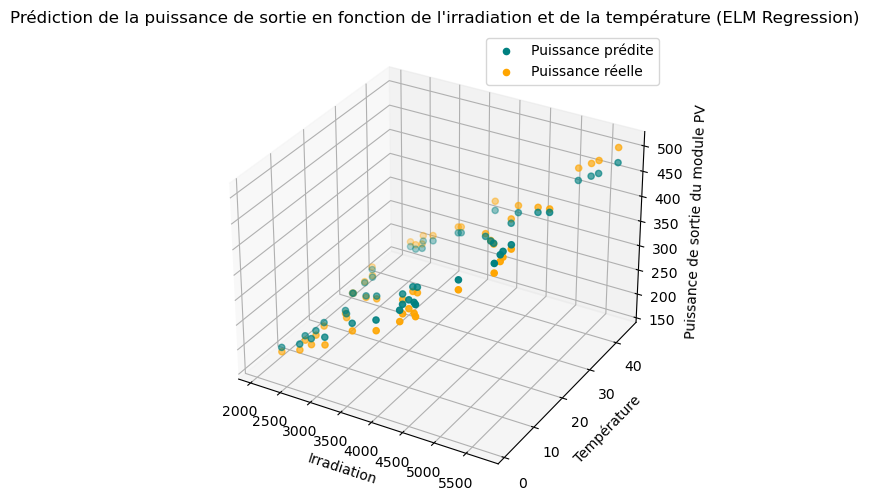

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import random
from sklearn.metrics import r2_score

def read_data_from_file(file_path, num_entries):
    data = []  # Crée une liste pour stocker les valeurs de vitesse du vent
    with open(file_path, 'r') as file:
        lines = file.readlines()
        selected_lines = random.sample(lines, num_entries)
        for line in selected_lines:
            line = line.strip()
            if line:
                d = float(line)  # Convertit la ligne en nombre flottant
                data.append(d)  # Ajoute la valeur de vitesse du vent à la liste
    return np.array(data)  # Convertit la liste en tableau NumPy et la retourne

file_path = r"C:\Users\LENOVO\Documents\Reseaux de neurones\irradiation.txt"  
num_entries = 1500  # Nombre d'entrées à utiliser
irradiation = read_data_from_file(file_path, num_entries)  # Appelle la fonction pour lire les données de vitesse du vent

file_path2 = r"C:\Users\LENOVO\Documents\Reseaux de neurones\temperature.txt"  
temperature = read_data_from_file(file_path2, num_entries)  # Appelle la fonction pour lire les données de vitesse du vent

def calculate_pv_power(irradiation, temperature):
    PCTS = 83  # Puissance maximale du module dans les conditions de test standard (CTS)
    ICTS = 1000  # Irradiance au CTS
    k = 0.003  # Coefficient de température
    Tr = 25  # Température de référence

    PPV = PCTS * irradiation * (1 + k * (temperature - Tr)) / ICTS
    return PPV

# Calcul de la puissance de sortie du module PV
pv_power_data = calculate_pv_power(irradiation, temperature)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.vstack((irradiation, temperature)).T, pv_power_data, test_size=50)

def elm(X, T, L):
    N, n = X.shape
    
    
    w = np.random.uniform(-1, 1, size=(L, n))
    b = np.random.uniform(-1, 1, size=(L, 1))
    
    
    H = np.zeros((N, L))
    for i in range(N):
        H[i] = np.maximum(0, np.dot(X[i], w.T) + b.T)
    
    beta = np.dot(np.linalg.pinv(H), T.reshape(-1, 1))
    
    return w, b, beta



def predict_elm(X,w, b, beta):
    N, _ = X.shape
    
    
    H = np.maximum(0, np.dot(X, w.T) + b.T)
    y_pred = np.dot(H, beta).flatten()
    
    return y_pred


# Entraînement du modèle ELM
L = 2  # Nombre de neurones dans la couche cachée
w, b, beta = elm(X_train, y_train, L)

# Prédiction sur l'ensemble de test
y_pred = predict_elm(X_test, w, b, beta)


squared_errors = (y_pred - y_test)**2

mse = np.mean(squared_errors)
print (mse)

# Calculer le score R2
r2 = r2_score(y_test, y_pred)
print("Score R2 sur l'ensemble de test :", r2)


# Affichage des résultats en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Affichage de la puissance prédite en fonction de l'irradiation et de la température
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='teal', label='Puissance prédite')
# Affichage de la puissance réelle en fonction de l'irradiation et de la température
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='orange', label='Puissance réelle')

ax.set_xlabel('Irradiation')  # Définir le label de l'axe x
ax.set_ylabel('Température')  # Définir le label de l'axe y
ax.set_zlabel('Puissance de sortie du module PV')  # Définir le label de l'axe z
ax.set_title('Prédiction de la puissance de sortie en fonction de l\'irradiation et de la température (ELM Regression)')  # Définir le titre du graphique
ax.legend()  # Afficher la légende

plt.show()  # Afficher le graphique


Score du modèle MLP sur l'ensemble de test : 0.9951199234629358
Mean Squared Error (MSE) : 44.504344833846716


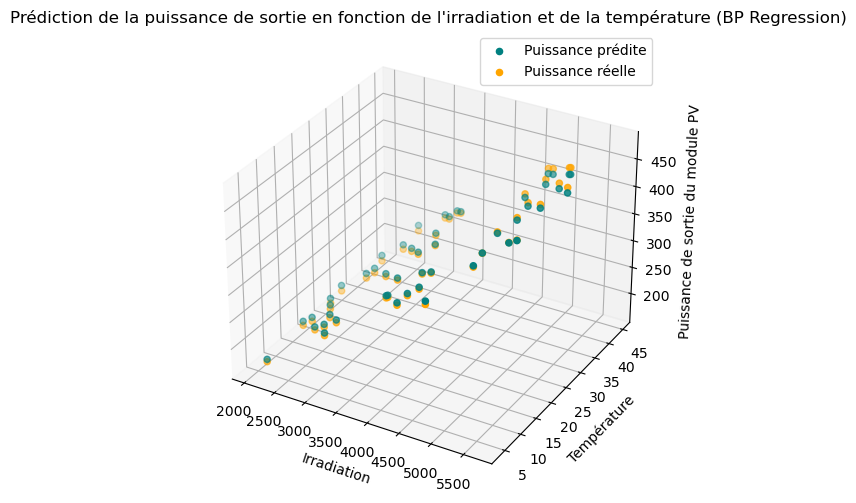

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random

# Fonction pour calculer la puissance de sortie de l'éolienne
def calculate_pv_power(irradiation, temperature):
    PCTS = 83  # Puissance maximale du module dans les conditions de test standard (CTS)
    ICTS = 1000  # Irradiance au CTS
    k = 0.003  # Coefficient de température
    Tr = 25  # Température de référence

    PPV = PCTS * irradiation/ ICTS * (1 + k * (temperature - Tr)) 
    return PPV
def read_data_from_file(file_path, num_entries):
    data = []  # Crée une liste pour stocker les valeurs de vitesse du vent
    with open(file_path, 'r') as file:
        lines = file.readlines()
        selected_lines = random.sample(lines, num_entries)
        for line in selected_lines:
            line = line.strip()
            if line:
                d = float(line)  # Convertit la ligne en nombre flottant
                data.append(d)  # Ajoute la valeur de vitesse du vent à la liste
    return np.array(data)  # Convertit la liste en tableau NumPy et la retourne

file_path = r"C:\Users\LENOVO\Documents\Reseaux de neurones\irradiation.txt"  
num_entries = 1500  # Nombre d'entrées à utiliser
irradiation = read_data_from_file(file_path, num_entries)  # Appelle la fonction pour lire les données de vitesse du vent

file_path2 = r"C:\Users\LENOVO\Documents\Reseaux de neurones\temperature.txt"  
temperature = read_data_from_file(file_path2, num_entries)  # Appelle la fonction pour lire les données de vitesse du vent


# Calcul de la puissance de sortie du module PV
y = calculate_pv_power(irradiation, temperature)


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.vstack((irradiation, temperature)).T, y, test_size=50, random_state=42)

# Créer et entraîner le régresseur MLP
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)
mlp_regressor.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
score = mlp_regressor.score(X_test, y_test)
print("Score du modèle MLP sur l'ensemble de test :", score)

# Prédire les valeurs sur l'ensemble de test
y_pred = mlp_regressor.predict(X_test)

# Calculer la MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) :", mse)

# Affichage des résultats en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Affichage de la puissance prédite en fonction de l'irradiation et de la température
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='teal', label='Puissance prédite')
# Affichage de la puissance réelle en fonction de l'irradiation et de la température
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='orange', label='Puissance réelle')

ax.set_xlabel('Irradiation')  # Définir le label de l'axe x
ax.set_ylabel('Température')  # Définir le label de l'axe y
ax.set_zlabel('Puissance de sortie du module PV')  # Définir le label de l'axe z
ax.set_title('Prédiction de la puissance de sortie en fonction de l\'irradiation et de la température (BP Regression)')  # Définir le titre du graphique
ax.legend()  # Afficher la légende

plt.show()  # Afficher le graphique